<a href="https://colab.research.google.com/github/jbugian/Data-Analyst/blob/master/Analisis%20Sueldos%20openqube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo las librerias que voy a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cargo la data en un DataFrame

In [2]:
df = pd.read_csv("Encuesta de remuneración salarial 2020.1.csv")

Reviso que se haya cargado ok, con las primeras 5 filas

In [5]:
df.head(5)

,Timestamp,Me identifico,Tengo,Estoy trabajando en,Dónde estás trabajando,Bolivia,Chile,Colombia,Cuba,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,México,Nicaragua,Panamá,Paraguay,Perú,Puerto Rico,República Dominicana,Uruguay,Venezuela,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,Universidad,Realizaste cursos de especialización,¿Contribuís a proyectos open source?,¿Programás como hobbie?,Trabajo de,Plataformas,Lenguajes de programación,"Frameworks, herramientas y librerías",Bases de datos,QA / Testing,IDEs,¿Qué SO usás en tu laptop/PC para trabajar?,¿Y en tu celular?,¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tipo de contrato,Salario mensual BRUTO (en tu moneda local),Salario mensual NETO (en tu moneda local),¿Qué tan conforme estás con tu sueldo?,Cómo creés que está tu sueldo con respecto al último semestre,Recibís algún tipo de bono,A qué está atado el bono,¿Tuviste ajustes por inflación en 2019?,¿De qué % fue el ajuste total?,¿En qué mes fue el último ajuste?,¿Sufriste o presenciaste situaciones de violencia laboral?,Orientación sexual,¿Tenés algún tipo de discapacidad?,¿Sentís que esto te dificultó el conseguir trabajo?,¿A qué eventos de tecnología asististe en el último año?,¿Sos miembro de alguna comunidad IT?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra,¿Habías respondido nuestra encuesta en ediciones anteriores?,"¿Cuáles considerás que son las mejores empresas de IT para trabajar en este momento, en tu ciudad?"
0,1/31/2020 6:50:26,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,3.0,1.0,0,Secundario,Completado,0,0,"Sí, de forma particular",Sí,No,0,Linux,"Bash/Shell, SQL",NaN,"MySQL, Oracle",NaN,"Nano, Notepad++",Windows,No tengo celular / no es Smartphone,No,0.0,Porcentaje de mi sueldo,Full-Time,45.0,40.0,2,2,No,No recibo bono,Dos,10.0,1,Jamás,Homosexual,NaN,NaN,NaN,NaN,10001+,Producto basado en Software,8,10,6.0,"Capacitaciones y/o cursos, Comidas pagas / sub...",No,cognizant
1,1/28/2020 9:27:48,Hombre,30,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,0,Terciario,Completado,Diseño Gráfico,antonio berni,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,soporte tecnico,Windows Server,"CSS, HTML, Javascript",Bootstrap,NaN,NaN,Visual Studio Code,Windows,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,48000.0,40000.0,1,1,No,No recibo bono,Dos,10.0,7,Jamás,Heterosexual,NaN,No,NaN,NaN,51-100,Otras industrias,7,3,35.0,Capacitaciones y/o cursos,No,mercadolibre
2,1/29/2020 16:54:29,Mujer,40,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,3.0,3.0,1,Universitario,Completado,Abogada,UBA - Universidad de Buenos Aires,No,No,No,Abogada,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Android,No,0.0,Bruto,Full-Time,42000.0,35000.0,3,2,No,No recibo bono,Dos,10.0,10,En mi trabajo actual,Heterosexual,NaN,No,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,8,8,30.0,"Abono de celular y/o Internet, Capacitaciones ...",No,NaN
3,2/1/2020 5:46:25,Mujer,36,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,3.0,3.0,0,Universitario,Completado,Abogada,UNC - Universidad Nacional de Córdoba,No,No,No,Abogado,Lex doctor,Ninguno,Ninguno,Ninguno,Ninguno,Ninguno,Windows,Android,No,0.0,Neto,Full-Time,75000.0,60000.0,3,3,No,No recibo bono,No,0.0,0,Jamás,Heterosexual,NaN,NaN,NaN,NaN,51-100,Otras industrias,7,5,4.0,Viáticos,No,NaN
4,2/1/2020 17:51:21,Hombre,29,Argentina,Ciudad Autónoma de Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2

Reviso la cantidad de registros totales del df

In [ ]:
len(df)

5982

Y por último el atributo describe() del dataframe para conocer los estadísticos descriptivos básicos del dataframe

In [ ]:
df.describe()

,Tengo,Bolivia,Chile,Colombia,Cuba,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,México,Nicaragua,Panamá,Paraguay,Perú,Puerto Rico,República Dominicana,Uruguay,Venezuela,Años de experiencia,Años en la empresa actual,Años en el puesto actual,Cuánto cobrás por guardia,Salario mensual BRUTO (en tu moneda local),Salario mensual NETO (en tu moneda local),¿Qué tan conforme estás con tu sueldo?,Cómo creés que está tu sueldo con respecto al último semestre,¿De qué % fue el ajuste total?,¿En qué mes fue el último ajuste?,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?
count,5982.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5982.000000,5982.000000,5982.000000,5.982000e+03,5.982000e+03,5.768000e+03,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5.982000e+03
mean,32.098629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.530709,3.560649,17.011802,1.487910e+04,1.133123e+09,1.261950e+10,2.544634,2.377131,24.358930,7.367101,7.158308,7.298228,1.003376e+05
std,7.654771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.194679,26.437144,1098.964596,9.183268e+05,8.763166e+10,9.584125e+11,0.861557,0.933609,20.886671,4.673915,2.105680,2.448464,7.757611e+06
min,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-1.000000e+00
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000e+00,4.641887e+04,4.000000e+04,2.000000,2.000000,3.000000,1.000000,6.000000,6.000000,2.000000e+00
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,2.000000,2.000000,0.000000e+00,7.200000e+04,6.000000e+04,3.000000,2.000000,21.000000,10.000000,7.000000,8.000000,6.000000e+00
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,4.000000,4.000000,0.000000e+00,1.100000e+05,8.300000e+04,3.000000,3.000000,40.000000,11.000000,9.000000,9.000000,1.500000e+01
max,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,2016.000000,85000.000000,7.000000e+07,6.777730e+12,7.278889e+13,4.000000,4.000000,100.000000,12.000000,10.000000,10.000000,6.000000e+08


Elimino las columnas que no voy a utilizar y renombro

In [3]:
df = df.drop([
    'Bolivia', 'Chile', 'Colombia', 'Cuba',
    'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
    'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'Puerto Rico',
    'República Dominicana', 'Uruguay', 'Venezuela'], axis =1 )


In [4]:
df = df.rename(columns={"Salario mensual BRUTO (en tu moneda local)": "Salario Bruto", "Salario mensual NETO (en tu moneda local)": "Salario Neto"})

In [ ]:
df.describe()

,Tengo,Años de experiencia,Años en la empresa actual,Años en el puesto actual,Cuánto cobrás por guardia,Salario Bruto,Salario Neto,¿Qué tan conforme estás con tu sueldo?,Cómo creés que está tu sueldo con respecto al último semestre,¿De qué % fue el ajuste total?,¿En qué mes fue el último ajuste?,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?
count,5982.000000,5982.000000,5982.000000,5982.000000,5.982000e+03,5.982000e+03,5.768000e+03,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5.982000e+03
mean,32.098629,8.530709,3.560649,17.011802,1.487910e+04,1.133123e+09,1.261950e+10,2.544634,2.377131,24.358930,7.367101,7.158308,7.298228,1.003376e+05
std,7.654771,7.194679,26.437144,1098.964596,9.183268e+05,8.763166e+10,9.584125e+11,0.861557,0.933609,20.886671,4.673915,2.105680,2.448464,7.757611e+06
min,15.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-1.000000e+00
25%,26.000000,3.000000,0.000000,0.000000,0.000000e+00,4.641887e+04,4.000000e+04,2.000000,2.000000,3.000000,1.000000,6.000000,6.000000,2.000000e+00
50%,31.000000,7.000000,2.000000,2.000000,0.000000e+00,7.200000e+04,6.000000e+04,3.000000,2.000000,21.000000,10.000000,7.000000,8.000000,6.000000e+00
75%,37.000000,12.000000,4.000000,4.000000,0.000000e+00,1.100000e+05,8.300000e+04,3.000000,3.000000,40.000000,11.000000,9.000000,9.000000,1.500000e+01
max,68.000000,45.000000,2016.000000,85000.000000,7.000000e+07,6.777730e+12,7.278889e+13,4.000000,4.000000,100.000000,12.000000,10.000000,10.000000,6.000000e+08


In [5]:
df.max(axis=None, skipna=None, level=None, numeric_only=None)
df.min(axis=None, skipna=None, level=None, numeric_only=None)

Timestamp                                                        1/1/2020 0:27:27
Me identifico                                                              Hombre
Tengo                                                                          15
Estoy trabajando en                                                     Argentina
Dónde estás trabajando                                                  Catamarca
Años de experiencia                                                             0
Años en la empresa actual                                                       0
Años en el puesto actual                                                        0
¿Gente a cargo?                                                                 0
Nivel de estudios alcanzado                                             Doctorado
Estado                                                                 Completado
Realizaste cursos de especialización                                           No
¿Contribuís a pr

Detectando valores Atípicos

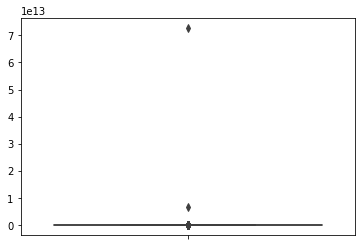

In [ ]:
#sns.boxplot(data=df)
sns.boxplot(y=['Salario Bruto','Salario Neto'],data=df)

count    5.982000e+03
mean     1.133123e+09
std      8.763166e+10
min      1.000000e+00
25%      4.641887e+04
50%      7.200000e+04
75%      1.100000e+05
max      6.777730e+12
Name: Salario Bruto, dtype: float64

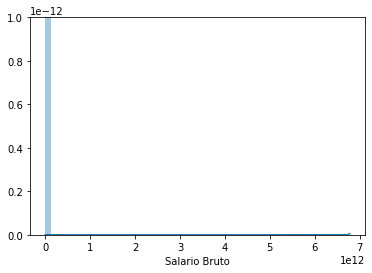

In [ ]:
sns.distplot(df['Salario Bruto'])
df['Salario Bruto'].describe()

Acoto los valores eliminando algunos extremos

In [6]:
corte_inferior = 10000
corte_superior = 1000000

df = df[(df["Salario Bruto"] < corte_superior) & (df["Salario Bruto"] > corte_inferior)]

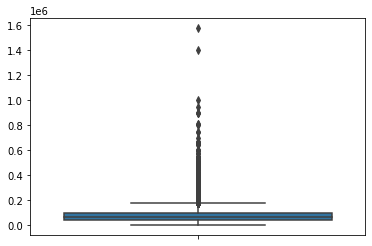

In [7]:
sns.boxplot(y=['Salario Bruto','Salario Neto'],data=df)

Disperción de salarios según años de experiencia

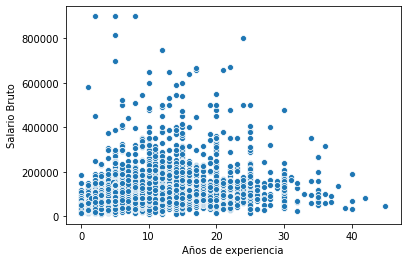

In [9]:
sns.scatterplot(y='Salario Bruto', x='Años de experiencia', data=df)
plt.show()